In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder , StandardScaler


In [3]:
data=pd.read_csv("Obesity Classification.csv")

In [4]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
data.columns


Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [6]:
data.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


In [7]:
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [10]:
data['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [11]:
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['Label'])
data['gender']=label_encoder.fit_transform(data['Gender'])
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label,target,gender
0,1,25,Male,175,80,25.3,Normal Weight,0,1
1,2,30,Female,160,60,22.5,Normal Weight,0,0
2,3,35,Male,180,90,27.3,Overweight,2,1
3,4,40,Female,150,50,20.0,Underweight,3,0
4,5,45,Male,190,100,31.2,Obese,1,1


In [12]:
if "Gender" in data.columns:
    df=data.drop(["Gender","Label","ID"],axis=1) # put the condtion  because without it run the cell in second time will raise error
df.head()

,Age,Height,Weight,BMI,target,gender
0,25,175,80,25.3,0,1
1,30,160,60,22.5,0,0
2,35,180,90,27.3,2,1
3,40,150,50,20.0,3,0
4,45,190,100,31.2,1,1


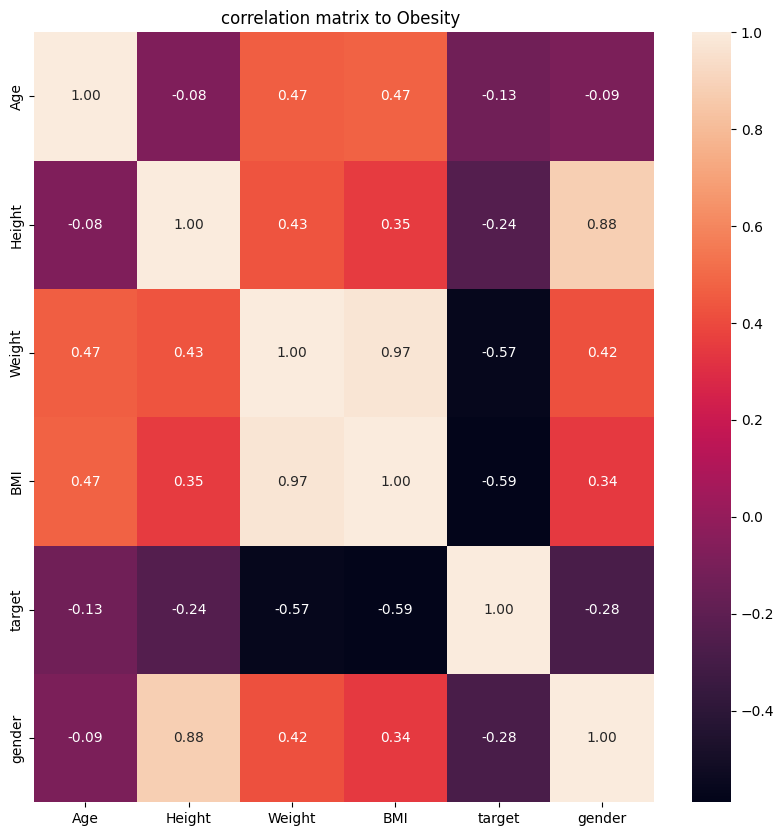

In [13]:
corrmatrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,fmt="0.2f",color="Red")
plt.title("correlation matrix to Obesity ")
plt.show()

In [14]:
x=df.drop("target",axis=1)
y=df['target']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [16]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [30]:
ypre=model.predict(x_test)
acc=accuracy_score(y_test,ypre)
print(f" accuracy score : {acc*100} % ")

 accuracy score : 92.5925925925926 % 
